# Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models import word2vec
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
import re
!pip install contractions
import contractions
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
!pip install pyspellchecker
from spellchecker import SpellChecker
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from io import BytesIO
import requests
import io
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
import gensim.downloader as api
import gensim
from sklearn.pipeline import Pipeline
import xgboost as xgb
from collections import Counter, defaultdict
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /Users/liuty132/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liuty132/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/liuty132/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/liuty132/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
google_model = api.load('word2vec-google-news-300')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/liuty132/Natural-Language-Processing-with-Disaster-Tweets/main/train.csv')
df.sample(10)

,id,keyword,location,text,target
4276,6074,heat%20wave,"Maricopa, AZ",@Startide It's hotter there than Phoenix this ...,0
5612,8008,razed,"Augusta, Maine, 04330",Vassalboro house to be razed to make way for p...,0
745,1077,bleeding,NaN,A rave wedding ? Am I seeing this my eyes are...,0
5861,8372,ruin,"2,360 miles away",I hate that Im so awkward and I ruin things,0
896,1297,bloody,65,@zhenghxn i tried 11 eyes akame ga kill and to...,0
6333,9054,structural%20failure,Asia,Rightways: Building structural integrity &amp;...,0
5215,7451,obliteration,NaN,@LaurenJauregui I would say I'm dead but I'm n...,0
2214,3171,deluge,London,Why so many half-naked men on Twitter tonight?...,0
1219,1757,buildings%20burning,NaN,@zourryart I forgot to add the burning buildin...,1
2657,3816,detonate,"Ottawa,Ontario Canada",Real Hip Hop: Apollo Brown Feat M.O.P. - Deton...,0


# Data Preprocessing/Tokenizing

Cleaning -> stopwords -> stemming(/lematization)

In [3]:
df1 = df.copy()

In [4]:
stop_words=nltk.corpus.stopwords.words('english')
stemmer=SnowballStemmer('english')
wnl=WordNetLemmatizer()

In [5]:
for i in range(df1.shape[0]):
    tweet = df1.text[i].lower()
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet) # URL
    tweet = re.sub(r'<.*?>', '', tweet) # html tags
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet, re.I|re.A) # miscellaneous text
    tweet = re.sub('\n', '', tweet) # skip line
    tweet = re.sub("["
                           u"\U0001F600-\U0001F64F"
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ', tweet) # emoji
    tweet = re.sub('\w*\d\w*', '', tweet)
    tweet = ' '.join([stemmer.stem(j) for j in tweet.split()])
    text = ' '.join([wnl.lemmatize(j) for j in tweet.split()])
    tweet = contractions.fix(tweet)
    tokens = nltk.word_tokenize(tweet)
    tokens = [j for j in tokens if len(j)>2]
    tweet = ' '.join([token for token in tokens if token not in stop_words]) # remove stopwords
    df1.text[i] = tweet

/var/folders/7g/62yfb6wn1l97qn_rmdfvxv2w0000gn/T/ipykernel_2173/593859491.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.text[i] = tweet


In [6]:
df1.sample(10)

,id,keyword,location,text,target
4464,6347,hostages,NaN,render assist gain proxi hostag fortun ssu,0
5882,8401,sandstorm,hkXfYMhEx,watch airport get swallow sandstorm minut,1
3579,5114,fatal,"Wood Buffalo, Alberta",roger goodel fatal mistak tom bradi innoc man,0
1217,1755,buildings%20burning,NaN,bradford back best burn build read weep leed,1
6379,9116,suicide%20bomb,NaN,pic old pkk suicid bomber deton bomb turkey ar...,1
1470,2118,catastrophe,NaN,peterjuk good ground believ polit militari cat...,1
3973,5647,flooding,NaN,crabbycal god memori flood back,0
2327,3345,demolished,Kilkenny,year old ring fort demolish,0
2554,3662,destroy,"Jerseyville, IL",dem flatlin destroy creativitybalancelongev am...,1
6946,9963,tsunami,in the Word of God,freefromwolv godslov amp thanku brother danni ...,0


# EDA

## Pie Chart

<AxesSubplot:>

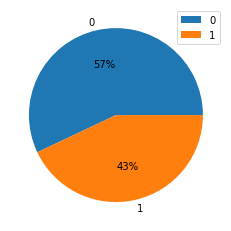

In [7]:
df.groupby('target').size().plot.pie(legend=True,autopct='%1.0f%%',ylabel='')

## Location

In [8]:
df["location"].isna().sum()

2533

In [9]:
df[df["target"]==1]["location"].value_counts().head(10)

USA               67
United States     27
Nigeria           22
India             20
Mumbai            19
UK                16
London            16
New York          16
Washington, DC    15
Canada            13
Name: location, dtype: int64

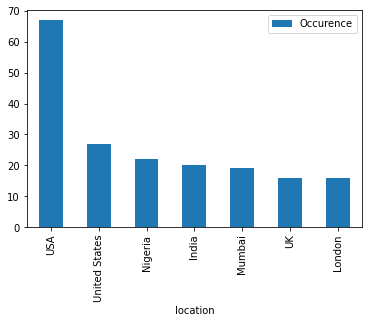

In [10]:
Location = pd.DataFrame({'location':['USA', 'United States', 'Nigeria',"India","Mumbai","UK","London"], 'Occurence':[67, 27, 22,20,19,16,16]})
bar1 = Location.plot.bar(x='location', y='Occurence')

In [ ]:
for i in range(df1.shape[0]):
    tweet = df1.text[i]
    tokens = nltk.word_tokenize(tweet)
    tweet = ' '.join([token for token in tokens if token not in ['amp']])
    df1.text[i] = tweet

<ipython-input-11-f3ac9adcd953>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.text[i] = tweet


## Word Clouds

### Before cleaning

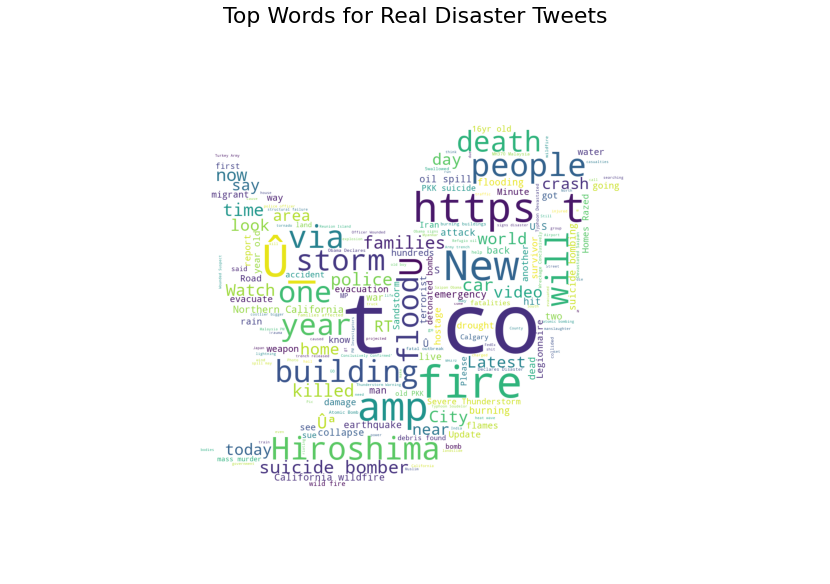

In [ ]:
response = requests.get('https://cdn.vox-cdn.com/thumbor/f01C1o3S2Fu6FEco1HKj4jmNFIg=/0x0:640x401/1820x1213/filters:focal(269x149:371x251):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/63699473/twitter_logo_640.0.1467740737.0.jpg')
img = Image.open(BytesIO(response.content))
img_matrix = np.array(img)

wc = WordCloud(background_color='white', max_words=200, mask=img_matrix)

wc.generate(' '.join(tweet for tweet in df.loc[df['target'] == 1]['text']))
plt.figure(figsize=(18,10))
plt.title('Top Words for Real Disaster Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

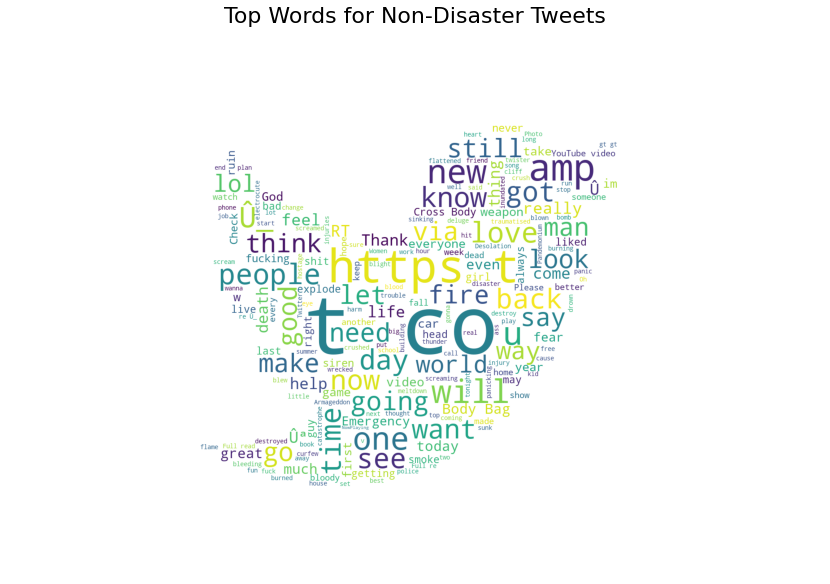

In [ ]:
response = requests.get('https://cdn.vox-cdn.com/thumbor/f01C1o3S2Fu6FEco1HKj4jmNFIg=/0x0:640x401/1820x1213/filters:focal(269x149:371x251):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/63699473/twitter_logo_640.0.1467740737.0.jpg')
img = Image.open(BytesIO(response.content))
img_matrix = np.array(img)

wc = WordCloud(background_color='white', max_words=200, mask=img_matrix)

wc.generate(' '.join(tweet for tweet in df.loc[df['target'] == 0]['text']))
plt.figure(figsize=(18,10))
plt.title('Top Words for Non-Disaster Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

### Cleaned

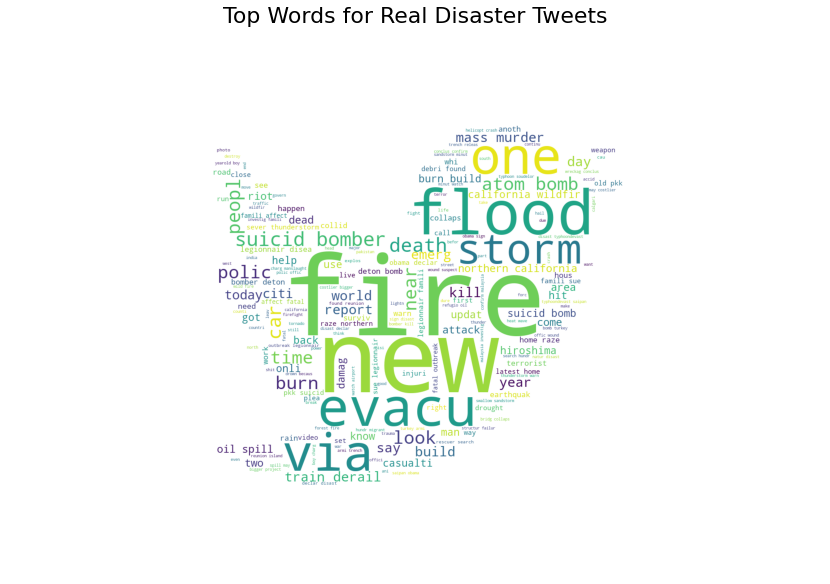

In [ ]:
response = requests.get('https://cdn.vox-cdn.com/thumbor/f01C1o3S2Fu6FEco1HKj4jmNFIg=/0x0:640x401/1820x1213/filters:focal(269x149:371x251):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/63699473/twitter_logo_640.0.1467740737.0.jpg')
img = Image.open(BytesIO(response.content))
img_matrix = np.array(img)

wc = WordCloud(background_color='white', max_words=200, mask=img_matrix)

wc.generate(' '.join(tweet for tweet in df1.loc[df['target'] == 1]['text']))
plt.figure(figsize=(18,10))
plt.title('Top Words for Real Disaster Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

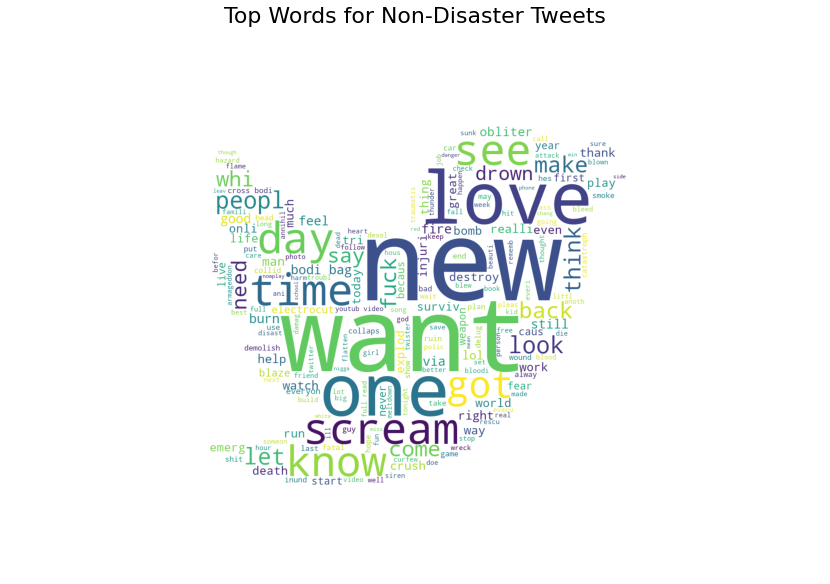

In [ ]:
response = requests.get('https://cdn.vox-cdn.com/thumbor/f01C1o3S2Fu6FEco1HKj4jmNFIg=/0x0:640x401/1820x1213/filters:focal(269x149:371x251):format(webp)/cdn.vox-cdn.com/uploads/chorus_image/image/63699473/twitter_logo_640.0.1467740737.0.jpg')
img = Image.open(BytesIO(response.content))
img_matrix = np.array(img)

wc = WordCloud(background_color='white', max_words=200, mask=img_matrix)

wc.generate(' '.join(tweet for tweet in df1.loc[df['target'] == 0]['text']))
plt.figure(figsize=(18,10))
plt.title('Top Words for Non-Disaster Tweets', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
for i in range(df1.shape[0]):
    tweet = df1.text[i]
    tokens = nltk.word_tokenize(tweet)
    tweet = ' '.join([token for token in tokens if token not in ['amp']])
    df1.text[i] = tweet

<ipython-input-16-f3ac9adcd953>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.text[i] = tweet


# CountVectorizer

In [ ]:
cv1 = CountVectorizer(ngram_range=(1,1)) # we want both unigram, increasing n exeends ram limit

In [ ]:
cv1_matrix = cv1.fit_transform(df['text'])

In [ ]:
count1 = pd.DataFrame(cv1_matrix.toarray(), index=df['id'].values, columns=cv1.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
count1

,00,000,0000,007npen6lg,00cy9vxeff,00end,00pm,01,02,0215,...,ûò,ûò800000,ûòthe,ûòåêcnbc,ûó,ûóher,ûókody,ûónegligence,ûótech,ûówe
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10871,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# X_train1, X_test1, y_train1, y_test1 = train_test_split(count1, df['target'], test_size=0.2, random_state=42)

In [ ]:
df.text[3]

'13,000 people receive #wildfires evacuation orders in California '

In [ ]:
cv2 = CountVectorizer(ngram_range=(1,1)) # we want both unigram

In [ ]:
cv2_matrix = cv2.fit_transform(df1['text'])

In [ ]:
count2 = pd.DataFrame(cv2_matrix.toarray(), index=df1['id'].values, columns=cv2.get_feature_names())

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
count2

,aaaa,aaaaaaallll,aaarrrgghhh,aaceorg,aal,aampb,aampw,aan,aannnnd,aar,...,zoom,zotar,zouma,zourryart,zrnf,zss,zumiez,zurich,zxatheti,zzzz
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10871,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10872,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(count2, df['target'], test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train1, y_train1)

LogisticRegression()

In [ ]:
print('Training accuracy: ', accuracy_score(lr1.predict(X_train1), y_train1))
print('Test accuracy: ', accuracy_score(lr1.predict(X_test1), y_test1))

Training accuracy:  0.9533661740558292
Test accuracy:  0.7925147734734077


## Naive Bayes

In [ ]:
nb1 = MultinomialNB()
nb1.fit(X_train1, y_train1)

MultinomialNB()

In [ ]:
print('Training accuracy: ', accuracy_score(nb1.predict(X_train1), y_train1))
print('Test accuracy: ', accuracy_score(nb1.predict(X_test1), y_test1))

Training accuracy:  0.9111658456486043
Test accuracy:  0.7951411687458962


## !SVM

## !Decision Tree

## !XGBoost

In [ ]:
"""
import xgboost as xgb
from sklearn.model_selection import GridSearchCV , cross_val_score
xgbr = xgb.XGBClassifier(objective='binary:logistic')
params_xgb = {'learning_rate': [0.005,0.01,0.02,0.03],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [250,500,1000,1200],
              'sampling_method':['uniform','gradient_base']}

grid_xgb = GridSearchCV(estimator=xgbr, verbose = 1, param_grid=params_xgb, cv = 4,scoring='accuracy',n_jobs=-1).fit(X_train1, y_train1)
xgbr_best = grid_xgb.best_estimator_
print('xgbr Best Score',grid_xgb.best_score_)
print('xgbr Best Parmas',grid_xgb.best_params_)
print('xgbr Accuracy',cross_val_score(xgbr_best,x, y, cv=4).mean())
"""

## Visualization

# Term Frequency–Inverse Document Frequency (Tf-Idf)

In [11]:
tfidf = TfidfVectorizer(ngram_range=(1,1), use_idf=True)
df_tfidf = pd.DataFrame(tfidf.fit_transform(df1.text).toarray(), 
                        columns=tfidf.get_feature_names())

/Users/liuty132/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_tfidf, df['target'], test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train2)

LogisticRegression()

In [ ]:
print('Training accuracy: ', accuracy_score(lr2.predict(X_train2), y_train2))
print('Test accuracy: ', accuracy_score(lr2.predict(X_test2), y_test2))

Training accuracy:  0.8863711001642036
Test accuracy:  0.7892317793827971


## Naive Bayes

In [13]:
nb2 = MultinomialNB()
nb2.fit(X_train2, y_train2)

MultinomialNB()

In [14]:
print('Training accuracy: ', accuracy_score(nb2.predict(X_train2), y_train2))
print('Test accuracy: ', accuracy_score(nb2.predict(X_test2), y_test2))

Training accuracy:  0.8977011494252873
Test accuracy:  0.8030203545633617


# Tf-Idf with Word2Vec Embedding

In [ ]:
w2v = dict(zip(google_model.wv.index2word, google_model.wv.syn0))

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(df1['text'], df1['target'], test_size=0.2, random_state=42)

In [ ]:
class TfidfEmbeddingVectorizer(object):
    '''
        Adapted from 
        https://github.com/nadbordrozd/blog_stuff/blob/master/classification_w2v/benchmarking_python3.ipynb
    '''
    
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.word2weight = None
        if len(word2vec)>0:
            self.dim=len(word2vec[next(iter(w2v))])
        else:
            self.dim=0
        
    def fit(self, X, y):
        tfidf = TfidfVectorizer(analyzer=lambda x: x)
        tfidf.fit(X)
        # if a word was never seen - it must be at least as infrequent
        # as any of the known words - so the default idf is the max of 
        # known idf's
        max_idf = max(tfidf.idf_)
        self.word2weight = defaultdict(
            lambda: max_idf, 
            [(w, tfidf.idf_[i]) for w, i in tfidf.vocabulary_.items()])
        return self
    
    def transform(self, X):
        return np.array([
                np.mean([self.word2vec[w] * self.word2weight[w]
                         for w in words if w in self.word2vec] or
                        [np.zeros(self.dim)], axis=0)
                for words in X
            ])

In [ ]:
w2v_tfidf = Pipeline([("vectorizer", TfidfEmbeddingVectorizer(w2v)), 
                      ("classifier", xgb.XGBClassifier(learning_rate=0.1, 
                                                       max_depth=6, 
                                                       subsample=0.8, 
                                                       colsample_bytree=0.8, 
                                                       n_estimators=100, 
                                                       eval_metric='auc'))])

In [ ]:
w2v_tfidf.fit([nltk.word_tokenize(tweet) for tweet in X_train3], np.array(y_train3))

Pipeline(steps=[('vectorizer',
                 <__main__.TfidfEmbeddingVectorizer object at 0x7fbb19bac4f0>),
                ('classifier',
                 XGBClassifier(colsample_bytree=0.8, eval_metric='auc',
                               max_depth=6, subsample=0.8))])

In [ ]:
print('Training accuracy: ', accuracy_score(w2v_tfidf.predict([nltk.word_tokenize(tweet) for tweet in X_train3]), y_train3))
print('Test f-1 accuracy: ', accuracy_score(w2v_tfidf.predict([nltk.word_tokenize(tweet) for tweet in X_test3]), y_test3))

Training accuracy:  0.9765188834154351
Test f-1 accuracy:  0.783322390019698


In [ ]:
w2v_tfidf_lr = Pipeline([("vectorizer", TfidfEmbeddingVectorizer(w2v)), 
                      ("classifier", LogisticRegression())])

In [ ]:
w2v_tfidf_lr.fit([nltk.word_tokenize(tweet) for tweet in X_train3], np.array(y_train3))

Pipeline(steps=[('vectorizer',
                 <__main__.TfidfEmbeddingVectorizer object at 0x7fbb1a940eb0>),
                ('classifier', LogisticRegression())])

In [ ]:
print('Training accuracy: ', accuracy_score(w2v_tfidf_lr.predict([nltk.word_tokenize(tweet) for tweet in X_train3]), y_train3))
print('Test f-1 accuracy: ', accuracy_score(w2v_tfidf_lr.predict([nltk.word_tokenize(tweet) for tweet in X_test3]), y_test3))

Training accuracy:  0.7850574712643679
Test f-1 accuracy:  0.7741300065659882


In [ ]:
w2v_best = Pipeline([("vectorizer", TfidfEmbeddingVectorizer(w2v)), 
                      ("classifier", xgb.XGBClassifier(learning_rate=0.1, 
                                                       max_depth=10, 
                                                       subsample=0.8, 
                                                       colsample_bytree=0.8, 
                                                       n_estimators=100, 
                                                       eval_metric='auc'))])

In [ ]:
w2v_best.fit([nltk.word_tokenize(tweet) for tweet in X_train3], np.array(y_train3))

Pipeline(steps=[('vectorizer',
                 <__main__.TfidfEmbeddingVectorizer object at 0x7fbb19baccd0>),
                ('classifier',
                 XGBClassifier(colsample_bytree=0.8, eval_metric='auc',
                               max_depth=10, subsample=0.8))])

In [ ]:
print('Training accuracy: ', accuracy_score(w2v_best.predict([nltk.word_tokenize(tweet) for tweet in X_train3]), y_train3))
print('Test f-1 accuracy: ', accuracy_score(w2v_best.predict([nltk.word_tokenize(tweet) for tweet in X_test3]), y_test3))

Training accuracy:  0.9817733990147783
Test f-1 accuracy:  0.7905449770190414


## !GridSearchCV (for max_depth + n_estimator)

In [ ]:
"""from sklearn.model_selection import GridSearchCV , cross_val_score
params_xgb = {'max_depth': [4,8,12],
        'n_estimators': [50,100,150]}
xgb_pipe =  Pipeline([("vectorizer", TfidfEmbeddingVectorizer(w2v)), ("classifier", xgb.XGBClassifier())])
grid = GridSearchCV(xgb_pipe, param_grid=params_xgb, cv = 3,scoring='accuracy').fit([nltk.word_tokenize(tweet) for tweet in X_train3], np.array(y_train3))
xgbr_best = grid.best_estimator_
print('xgbr Best Score',grid.best_score_)
print('xgbr Best Parmas',grid.best_params_)
print('xgbr Accuracy',cross_val_score(xgbr_best,[nltk.word_tokenize(tweet) for tweet in X_train3], np.array(y_train3), cv=3).mean())"""

In [ ]:
,6,8,10
,75,100,125,150

# !Visualization

(0.76, 0.82)

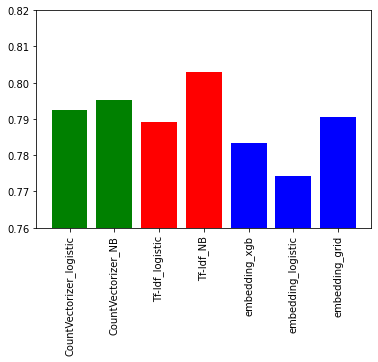

In [ ]:
CountVectorizer_logistic = accuracy_score(lr1.predict(X_test1), y_test1)
CountVectorizer_NB = accuracy_score(nb1.predict(X_test1), y_test1)
tfidf_logistic = accuracy_score(lr2.predict(X_test2), y_test2)
tfidf_NB = accuracy_score(nb2.predict(X_test2), y_test2)
embedding_xgb = accuracy_score(w2v_tfidf.predict([nltk.word_tokenize(tweet) for tweet in X_test3]), y_test3)
embedding_logistic = accuracy_score(w2v_tfidf_lr.predict([nltk.word_tokenize(tweet) for tweet in X_test3]), y_test3)
embedding_grid = accuracy_score(w2v_best.predict([nltk.word_tokenize(tweet) for tweet in X_test3]), y_test3)
test_accuracy = [CountVectorizer_logistic,CountVectorizer_NB,tfidf_logistic,tfidf_NB,embedding_xgb,embedding_logistic,embedding_grid]
plt.bar([0,1],[CountVectorizer_logistic,CountVectorizer_NB],color="green")
plt.bar([2,3],[tfidf_logistic,tfidf_NB],color="red")
plt.bar([4,5,6],[embedding_xgb,embedding_logistic,embedding_grid],color='blue')
plt.xticks(range(len(test_accuracy)),["CountVectorizer_logistic","CountVectorizer_NB","Tf-Idf_logistic","Tf-Idf_NB","embedding_xgb","embedding_logistic","embedding_grid"],rotation=90)
plt.ylim([0.76,0.82])

In [ ]:
pc1 = []
pc2 = []
pc3 = []

for sample_size in [100, 500, 1000, 2000]:
    cv2 = CountVectorizer(ngram_range=(1,1))
    cv2_matrix = cv2.fit_transform(df1['text'])
    count2 = pd.DataFrame(cv2_matrix.toarray(), index=df1['id'].values, columns=cv2.get_feature_names())

    tfidf = TfidfVectorizer(ngram_range=(1,1), use_idf=True)
    df_tfidf = pd.DataFrame(tfidf.fit_transform(df1.text).toarray(), 
                            columns=tfidf.get_feature_names())

    training_prop = sample_size/df1.shape[0]

    X_train1, X_test1, y_train1, y_test1 = train_test_split(count2, df1['target'], test_size=1-training_prop, random_state=42)
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_tfidf, df1['target'], test_size=1-training_prop, random_state=42)
    X_train3, X_test3, y_train3, y_test3 = train_test_split(df1['text'], df1['target'], test_size=1-training_prop, random_state=42)

    lr1 = LogisticRegression()
    lr1.fit(X_train1, y_train1)
    nb2 = MultinomialNB()
    nb2.fit(X_train2, y_train2)
    w2v_best.fit([nltk.word_tokenize(tweet) for tweet in X_train3], np.array(y_train3))

    pc1.append(accuracy_score(lr1.predict(X_test1), y_test1))
    pc2.append(accuracy_score(nb2.predict(X_test2), y_test2))
    pc3.append(accuracy_score(w2v_best.predict([nltk.word_tokenize(tweet) for tweet in X_test3]), y_test3))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [ ]:
print(pc1,pc2,pc3)

[0.6199920138426727, 0.7214958526641361, 0.7448964161500076, 0.7762337430963834] [0.5985624916810861, 0.7157317587515816, 0.7465598064418569, 0.7821129520755389] [0.6829495541062159, 0.7341487417404752, 0.751096325419628, 0.7639408515945127]


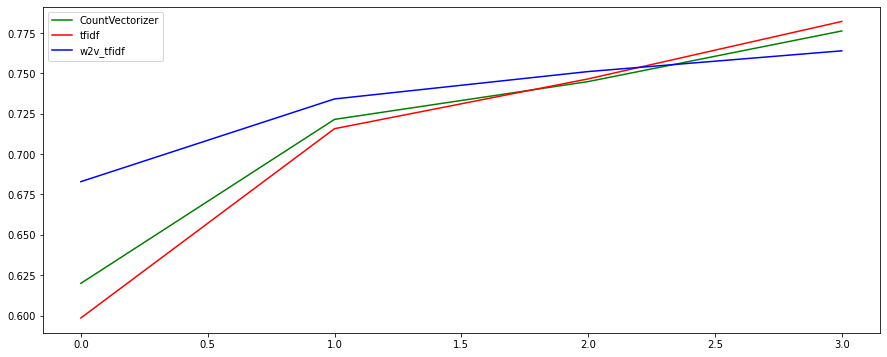

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(pc1,color="green",label= "CountVectorizer")
plt.plot(pc2,color="red",label="tfidf")
plt.plot(pc3,color="blue",label="w2v_tfidf")
plt.legend()